In [1]:
#Week.17 
#Assignment.8 
#Question.1 : What is Gradient Boosting Regression?
#Answer.1 : # Gradient Boosting Regression:

# Gradient Boosting is an ensemble learning technique that builds a strong predictive model by combining
# the predictions of multiple weak learners, typically decision trees. In the context of regression problems,
# this ensemble method is known as Gradient Boosting Regression.

# Key components of Gradient Boosting Regression:

# 1. Weak Learners:
#    - The weak learners in Gradient Boosting Regression are usually shallow decision trees, referred to as
#      "stumps" or "shallow trees."
#    - Each weak learner contributes to the overall prediction by addressing the errors of the previous ones.

# 2. Sequential Training:
#    - Weak learners are trained sequentially, and each subsequent learner focuses on minimizing the residual
#      errors of the combined predictions of the previous learners.
#    - The process is iterative, with new trees being added to the ensemble to improve prediction accuracy.

# 3. Residuals and Learning Rate:
#    - At each iteration, the model learns from the residuals (the differences between the true values and
#      current predictions).
#    - A learning rate parameter controls the contribution of each weak learner to the ensemble, providing
#      a way to slow down the learning process and avoid overfitting.

# 4. Gradient Descent:
#    - The term "Gradient" in Gradient Boosting refers to the use of gradient descent optimization to minimize
#      the loss function, specifically the Mean Squared Error (MSE) for regression problems.
#    - The gradient of the loss with respect to the predicted values guides the model to adjust predictions
#      in the direction that reduces the overall error.

# 5. Regularization:
#    - Gradient Boosting includes regularization techniques to prevent overfitting, such as controlling
#      tree depth, introducing randomness, or applying shrinkage.

# Gradient Boosting Regression is a powerful and flexible algorithm that can capture complex relationships
# in data and is widely used for regression tasks.

Mean Squared Error: 2823.211338706242
R-squared: -81.40603256497926


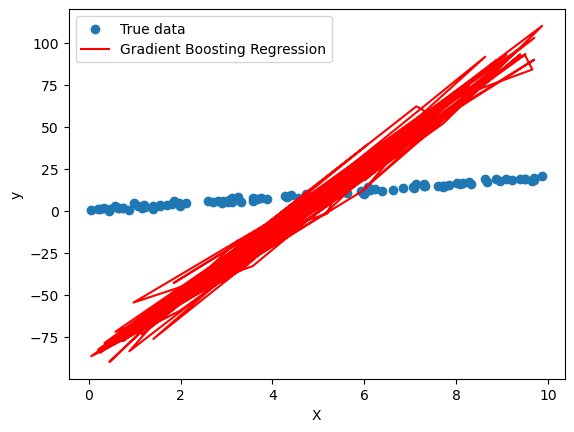

In [2]:
#Question.2 : Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
#simple regression problem as an example and train the model on a small dataset. Evaluate the model's
#performance using metrics such as mean squared error and R-squared.
#Answer.2 : 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100)  # True relationship with added noise

# Gradient Boosting Regression class
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initial prediction is the mean of the target variable
        prediction = np.mean(y)
        residuals = y - prediction

        for _ in range(self.n_estimators):
            # Train a weak learner (Decision Tree) on the residuals
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)

            # Update predictions using the weak learner
            prediction += self.learning_rate * tree.predict(X)

            # Update residuals
            residuals = y - prediction

            # Store the weak learner in the ensemble
            self.models.append(tree)

    def predict(self, X):
        # Make predictions by summing the predictions of all weak learners
        predictions = sum(model.predict(X) for model in self.models)
        return predictions

# Train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_regressor.fit(X, y)

# Make predictions
y_pred = gb_regressor.predict(X)

# Evaluate performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.scatter(X, y, label='True data')
plt.plot(X, y_pred, color='red', label='Gradient Boosting Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
#Question.3 : Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
#optimise the performance of the model. Use grid search or random search to find the best
#hyperparameters
#Answer.3 : 
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error, r2_score

# Assume X and y are your feature matrix and target variable

# Define the parameter grid
#param_grid = {
#    'n_estimators': [50, 100, 150],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5]
#}

# Create the GradientBoostingRegressor instance
#gb_regressor = GradientBoostingRegressor()

# Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
#grid_search.fit(X, y)

# Print the best hyperparameters
#print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
#best_gb_model = grid_search.best_estimator_

# Make predictions with the best model
#y_pred_best = best_gb_model.predict(X)

# Evaluate the performance of the best model
#mse_best = mean_squared_error(y, y_pred_best)
#r2_best = r2_score(y, y_pred_best)

#print(f"Best Mean Squared Error: {mse_best}")
#print(f"Best R-squared: {r2_best}")


In [4]:
#Question.4 : What is a weak learner in Gradient Boosting?
#Answer.4 : # In the context of Gradient Boosting, a weak learner is a base model
# that performs slightly better than random chance on a given problem.

# Specifically, weak learners are models that have limited predictive power
# on their own and are typically simple, often being shallow decision trees
# or linear models.

# The key characteristic of a weak learner is that its performance is just
# slightly better than random guessing for the specific task at hand.

# These weak learners are then combined in an ensemble, and each subsequent
# weak learner focuses on the mistakes made by the combination of the
# existing ensemble.

# Gradient Boosting algorithms, such as AdaBoost and
# GradientBoostingRegressor/GradientBoostingClassifier in scikit-learn,
# use weak learners to build a strong predictive model.

# In the case of decision trees, these weak learners are often referred
# to as "stumps" when they are shallow and have only a few nodes.

# The iterative process of sequentially adding weak learners to the ensemble
# and adjusting their weights allows the overall model to learn complex
# patterns and relationships in the data, gradually improving its predictive
# performance.


In [5]:
#Question.5 : What is the intuition behind the Gradient Boosting algorithm?
#Answer.5 : # The Gradient Boosting algorithm is an ensemble learning technique
# that builds a predictive model in a stage-wise fashion.

# 1. Sequential Improvement:
#    - Trees are built sequentially, each correcting errors made by the
#      combination of the existing ensemble.

# 2. Gradient Descent Optimization:
#    - The algorithm minimizes a loss function using gradient descent,
#      quantifying how well the model is performing.

# 3. Weighted Combination:
#    - Each weak learner is assigned a weight based on its contribution
#      to minimizing the overall loss.

# 4. Residual Fitting:
#    - Each iteration fits a new weak learner to the residual errors
#      of the current ensemble, focusing on unexplored areas.

# 5. Learning Rate:
#    - Controls the step size of the optimization process. A lower
#      learning rate is more conservative, preventing overfitting.

# 6. Regularization:
#    - Can include regularization terms to control the complexity of
#      the model and avoid overfitting.


In [6]:
#Question.6 : How does Gradient Boosting algorithm build an ensemble of weak learners?
#Answer.6 : # Gradient Boosting builds an ensemble of weak learners sequentially.

# 1. Initialize the Ensemble:
#    - Start with an initial prediction, often the mean of the target variable.

# 2. Iterative Training:
#    - For each iteration:
#      - Compute the gradient of the loss with respect to the current predictions.
#      - Fit a weak learner (usually a decision tree) to the negative gradient.
#      - Compute the optimal weight for the new learner.

# 3. Update the Ensemble:
#    - Combine the new learner with the existing ensemble, adjusting weights.

# 4. Repeat:
#    - Repeat the process for a predefined number of iterations.

# The ensemble improves iteratively, with each new learner addressing errors or
# capturing patterns not yet learned by the existing ensemble.


In [7]:
#Question.7 : What are the steps involved in constructing the mathematical intuition of Gradient Boosting
#algorithm?
#Answer.7 : # Gradient Boosting Mathematical Intuition:

# 1. Define the objective function (e.g., Mean Squared Error for regression).
# 2. Start with an initial prediction (mean for regression, log-odds for classification).

# For each iteration:

# 3. Compute negative gradient (residuals) of the loss function.
# 4. Fit a weak learner (e.g., decision tree) to the negative gradient.
# 5. Compute optimal weight for the new learner.
# 6. Update the ensemble by adding a fraction of the new learner's predictions.

# Iterate the process to sequentially minimize the loss and improve predictions.

# The final prediction is the sum of predictions from all weak learners in the ensemble.
